## Q2: Consistent plotting

(This is about python's decorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should initialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifull, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker/blob/master/skywalker/skywalker.py#L31).  

In [3]:
"""
Decorator for matplotlib plots to apply consistent style and
optionally add grids and save the figure to a pdf file.
"""

def myplot(func):

    import functools
    import os

    @functools.wraps(func)
    def wrapper(*args, save=True, filename=None, dpi=300, path=".", grid=True, **kwargs):
        
        from matplotlib import rc
        import matplotlib.pyplot as plt
        import matplotlib
        from matplotlib.ticker import LogLocator

        # --- Global style settings ---
        font = {
            'family': 'serif',
            'serif': ['cmr10'],
            'weight': 'medium',
            'size': 16
        }
        rc('font', **font)
        rc('text', usetex=True)
        matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
        matplotlib.rcParams["axes.formatter.use_mathtext"] = True

        rc('figure', max_open_warning=1000)
        rc('ytick', right=False, labelsize=14)
        rc('xtick', top=False, labelsize=14)
        rc("axes", grid=False, titlesize=18, labelsize=16)

        # --- Call original plotting function ---
        fig = func(*args, **kwargs)

        # --- Layout ---
        if hasattr(fig, "set_constrained_layout"):
            fig.set_constrained_layout(True)

        # --- Add grid only if requested ---
        if grid:
            for ax in fig.axes:
                ax.set_axisbelow(True)  # grid behind lines
                # Major grid
                ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.6)
                # Minor grid
                ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.4)

        # --- Add minor ticks for log scales regardless of grid ---
        for ax in fig.axes:
            if ax.get_xscale() == 'log':
                ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=None, numticks=10))
            if ax.get_yscale() == 'log':
                ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=None, numticks=10))

        # --- Save figure ---
        if save:
            if not os.path.exists(path):
                os.makedirs(path)

            # Auto-name file after function name if user does not specify
            if filename is None:
                filename = f"{func.__name__}.pdf"
            else:
                filename = os.path.splitext(filename)[0] + ".pdf"

            filepath = os.path.join(path, filename)
            fig.savefig(filepath, dpi=dpi, bbox_inches="tight")

            print(f"[myplot] Figure saved to: {filepath}")

        plt.show()

        plt.close(fig)

    return wrapper


In [5]:
"""
Decorator for colormap plots to apply consistent style and optionally save the figure as .pdf.
"""


def myplot_cmap(func):
    import functools, os
    import matplotlib.pyplot as plt

    @functools.wraps(func)
    def wrapper(*args, save=True, filename=None, dpi=300, path=".", **kwargs):

        from matplotlib import rc
        import matplotlib.pyplot as plt
        import matplotlib
        from matplotlib.ticker import LogLocator

        # --- Global style settings ---
        font = {
            'family': 'serif',
            'serif': ['cmr10'],
            'weight': 'medium',
            'size': 16
        }
        rc('font', **font)
        rc('text', usetex=True)
        matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
        matplotlib.rcParams["axes.formatter.use_mathtext"] = True

        rc('figure', max_open_warning=1000)
        rc('ytick', right=False, labelsize=14)
        rc('xtick', top=False, labelsize=14)
        rc("axes", grid=False, titlesize=18, labelsize=16)

        # --- Call original plotting function ---        
        fig = func(*args, **kwargs)

        fig.tight_layout(pad=1.0)

        # Save figure
        if save:
            if not os.path.exists(path):
                os.makedirs(path)
            if filename is None:
                filename = f"{func.__name__}.pdf"
            else:
                filename = os.path.splitext(filename)[0] + ".pdf"
            filepath = os.path.join(path, filename)
            fig.savefig(filepath, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
            print(f"[myheatmap] Figure saved to: {filepath}")

        plt.show()
        plt.close(fig)

    return wrapper


[myplot] Figure saved to: .\plot_example.pdf


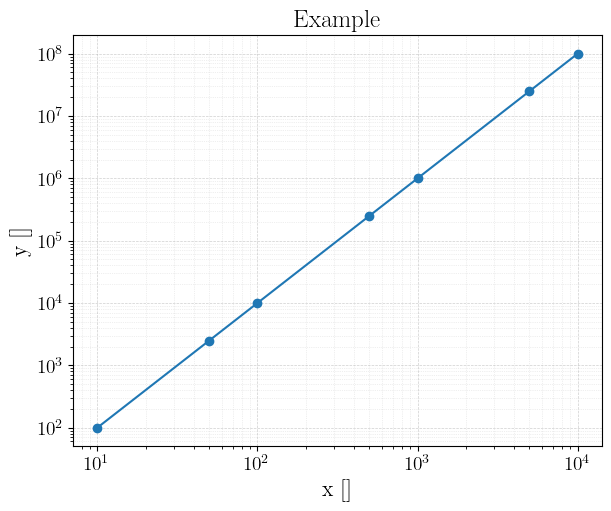

In [7]:
import numpy as np

# --- Plot function ---
def ex_plot(x, y):

    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.plot(x, y, marker='o', linestyle='-')
    ax.set_xlabel("x []")
    ax.set_ylabel("y []")
    ax.set_title("Example")
    ax.set_xscale('log')
    ax.set_yscale('log')

    return fig

# --- Generate example data ---
x = np.array([10, 50, 100, 500, 1000, 5000, 10000])
y = x**2

# --- Plot using your decorator ---
d_plot = myplot(ex_plot)
d_plot(x, y, filename="plot_example")


[myplot] Figure saved to: .\plot_example_2.pdf


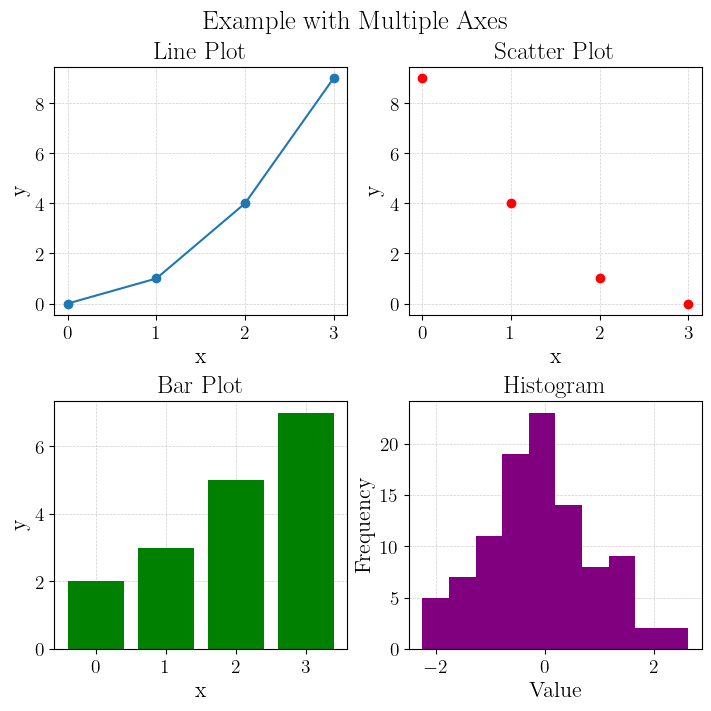

In [11]:
@myplot
def ex_plot_2():
    
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axs = plt.subplots(2, 2, figsize=(7, 7))

    # Line plot
    axs[0, 0].plot([0, 1, 2, 3], [0, 1, 4, 9], marker='o')
    axs[0, 0].set_title("Line Plot")
    axs[0, 0].set_xlabel("x")
    axs[0, 0].set_ylabel("y")

    # Scatter plot
    axs[0, 1].scatter([0, 1, 2, 3], [9, 4, 1, 0], color='r')
    axs[0, 1].set_title("Scatter Plot")
    axs[0, 1].set_xlabel("x")
    axs[0, 1].set_ylabel("y")

    # Bar plot
    axs[1, 0].bar([0, 1, 2, 3], [2, 3, 5, 7], color='g')
    axs[1, 0].set_title("Bar Plot")
    axs[1, 0].set_xlabel("x")
    axs[1, 0].set_ylabel("y")

    # Histogram plot
    data = np.random.randn(100)
    axs[1, 1].hist(data, bins=10, color='purple')
    axs[1, 1].set_title("Histogram")
    axs[1, 1].set_xlabel("Value")
    axs[1, 1].set_ylabel("Frequency")

    fig.suptitle("Example with Multiple Axes")
    
    return fig



# --- Call the example ---
ex_plot_2(filename="plot_example_2")


[myheatmap] Figure saved to: .\plot_map_example.pdf


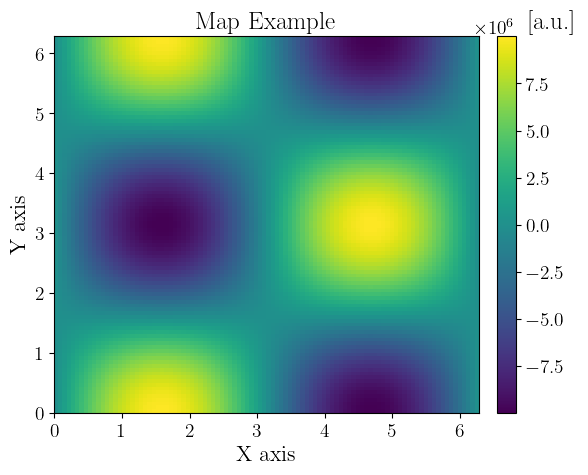

In [15]:
@myplot_cmap
def ex_plot_map():

    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(6, 5))

    x = np.linspace(0, 2*np.pi, 100)
    y = np.linspace(0, 2*np.pi, 100)
    X, Y = np.meshgrid(x, y)
    
    Z = np.sin(X) * np.cos(Y) * 1e7

    # Display heatmap
    im = ax.imshow(
        Z,
        origin='lower',
        extent=[0, 2*np.pi, 0, 2*np.pi],
        cmap='viridis',
        aspect='auto'
    )

    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_title("Map Example")

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_title("[a.u.]")  # label
    cbar.ax.title.set_position([3.0, 1.0])  # label position

    return fig



# --- Call the example ---
ex_plot_map(filename="plot_map_example")


## Q3: Scaling

(This is about multiprocessing)

The ["scaling"](https://hpc-wiki.info/hpc/Scaling) of a code refers to its performance of as a function of the number of cores adopted. 

- Define a computationally intensive task (something like an operation on two giant arrays with >1e7 numbers or, even better!, pick somethinbg from your research). 
- Make sure it's embarrassingly parallel. 
- Implement a parallelization strategy using multiprocessing. 
- Plot the time the code takes as a function of the number of cores.
- Figure out the number of cores in your CPU and make sure the plot extends both below and above this number.
- Interpret the resulting features. 
- A perfect scaling results in straight line (linear dependency). How perfect is your scaling?

### Important
Numpy has some inner, semi-automatic parallelization functionalities. Some, but not all, numpy functions detect the number of CPUs in your machine and make good use of them. That's great for most applications, but when performing a scaling study you want to control the parallelization yourself and disable what's done internally by numpy. The following forces numpy to use a single core.  

In [64]:
import numpy as np
from tqdm import tqdm
import time
import multiprocessing
import pathos.multiprocessing as pmp
import os

# Prevent NumPy from using multi-threading
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

N = int(1e8)
batch = int(1e5) # number of simulations per batch
N_CORE = multiprocessing.cpu_count()

# Create list of batches
batch_list = [batch] * (N_MC // batch)

code_time = np.zeros(N_CORE)

print(f"Detected CPU cores: {N_CORE}\n")

# --- function ---
def fun_batch(batch_size):
    import numpy as np

    x = np.linspace(0, 20, batch_size)

    a = np.sin(3*x) + np.cos(0.2*x) + np.sqrt(x + 1)
    b = np.exp(-0.1*x) * np.sin(np.sqrt(x))
    c = (x + 1)**0.3 + np.cos(0.5*x) * np.exp(-0.05*x)

    sigma = 1.0 + 0.3*np.sin(0.1*x)
    d = np.exp(-0.5 * (x/sigma)**2) / (np.sqrt(2*np.pi) * sigma)

    r = np.random.rand(batch_size) * 0.1

    # combine all terms
    return 0.25*a + 0.25*b + 0.25*c + 0.15*d + 0.10*r


# --- Loop over number of cores ---
for N_use in range(1, N_CORE + 1):

    print(f"Running with {N_use} core(s)...")

    multiprocessing.freeze_support()
    pool = pmp.ProcessingPool(N_use)

    start = time.time()
    
    results = list(tqdm(
        pool.imap(fun_batch, batch_list),
        total=len(batch_list),
        desc=f"Processing with {N_use} core(s)"
    ))

    end = time.time()

    # clean up pool
    pool.close()
    pool.join()
    pool.terminate()
    pool.restart()
    del pool

    # concatenate results from all batches
    Ids = np.concatenate(results)

    # store execution time
    code_time[N_use - 1] = end - start


# --- Summary of execution times ---
print("\n--- Execution Times ---")
for i, t in enumerate(code_time, start=1):
    print(f"{i} core(s): {t:.3f} s")


Detected CPU cores: 8

Running with 1 core(s)...


Processing with 1 core(s): 100%|███████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.57it/s]


Running with 2 core(s)...


Processing with 2 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.11it/s]


Running with 3 core(s)...


Processing with 3 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.59it/s]


Running with 4 core(s)...


Processing with 4 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.78it/s]


Running with 5 core(s)...


Processing with 5 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.16it/s]


Running with 6 core(s)...


Processing with 6 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.81it/s]


Running with 7 core(s)...


Processing with 7 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.62it/s]


Running with 8 core(s)...


Processing with 8 core(s): 100%|██████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 160.50it/s]



--- Execution Times ---
1 core(s): 14.872 s
2 core(s): 9.420 s
3 core(s): 7.986 s
4 core(s): 7.463 s
5 core(s): 6.797 s
6 core(s): 6.523 s
7 core(s): 6.281 s
8 core(s): 6.393 s


[myplot] Figure saved to: .\ex_7_3.pdf


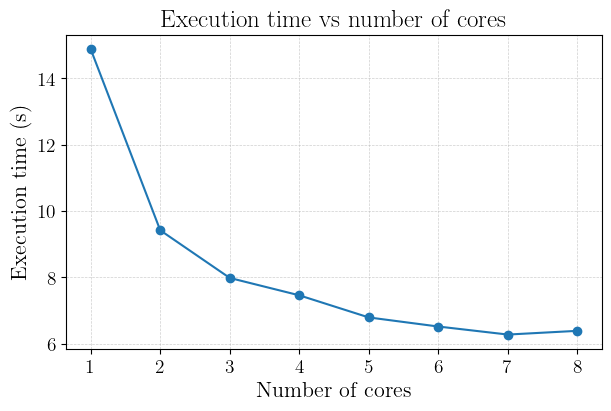

In [155]:
@myplot
def plot_time_vs_cores(code_time):

    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    ax.plot(range(1, len(code_time) + 1), code_time, marker='o')
    ax.set_xlabel("Number of cores")
    ax.set_ylabel("Execution time (s)")
    ax.set_title("Execution time vs number of cores")
    
    return fig

plot_time_vs_cores(code_time, filename="ex_7_3")